# Oil Spill prediction
- followiing is the link for dataset: https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection
- It exhibits severe multicollinearity, leading to several warnings.
- All four models performed well:
  - QDA and SVM outperformed the others due to thent ability to handle multicollinear daos.


### Note: Such high accuracy results are typically not observed in real-life scenarios.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,auc,accuracy_score,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv('oil_spill.csv')
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [3]:
print(df.isnull().sum())
print(df.info())

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-nu

In [4]:
x = df.drop(['target'],axis=1)
y = df['target']

In [5]:
# Balancing the imbalanced data
smote = SMOTE(random_state =42)
X,Y = smote.fit_resample(x, y)
x_train,X_test,y_train,Y_test = train_test_split(X,Y,test_size= 0.2, random_state= 42)
# scaling
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
X_test = scaler.fit_transform(X_test)

### Accuracy: Proportion of total correct predictions (both true positives and true negatives) out of all predictions made.
### Precision: Proportion of true positive predictions out of all positive predictions made. It measures how many of the predicted positives are actually positive.
###  Recall (Sensitivity): Proportion of true positive predictions out of all actual positives. It measures how many of the actual positives were correctly predicted.
### specificity: Proportion of true negative predictions out of all actual negatives. It measures how many of the actual negatives were correctly predicted.
### F1 Score: Harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single score that summarizes the performance of the model on both metrics.

In [6]:
def plot_confusion_matrices(y_true_test, y_pred_test, y_true_train, y_pred_train):
    # Confusion matrix for the test set
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix=cm_test).plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title('Test Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    # Confusion matrix for the train set
    cm_train = confusion_matrix(y_true_train, y_pred_train)
    plt.subplot(1, 2, 2)
    ConfusionMatrixDisplay(confusion_matrix=cm_train).plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
def print_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test):
    # Train metrics
    train_accuracy = accuracy_score(y_true_train, y_pred_train)
    train_precision = precision_score(y_true_train, y_pred_train)
    train_recall = recall_score(y_true_train, y_pred_train)
    cm_train = confusion_matrix(y_true_train, y_pred_train)
    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
    train_specificity = tn_train / (tn_train + fp_train)
    train_f1_score = f1_score(y_true_train, y_pred_train)
    # Test metrics
    test_accuracy = accuracy_score(y_true_test, y_pred_test)
    test_precision = precision_score(y_true_test, y_pred_test)
    test_recall = recall_score(y_true_test, y_pred_test)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
    test_specificity = tn_test / (tn_test + fp_test)
    test_f1 = f1_score(y_true_test, y_pred_test)
    # Print metrics for both train and test
    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.2f}")
    print(f"Precision: {train_precision:.2f}")
    print(f"Sensitivity (Recall): {train_recall:.2f}")
    print(f"Specificity: {train_specificity:.2f}")
    print(f"F1 Score: {train_f1_score:.2f}")
    print("\nTesting Metrics:")
    print(f"Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {test_precision:.2f}")
    print(f"Sensitivity (Recall): {test_recall:.2f}")
    print(f"Specificity: {test_specificity:.2f}")
    print(f"F1 Score: {test_f1:.2f}")

# Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Training Metrics:
Accuracy: 0.97
Precision: 0.96
Sensitivity (Recall): 0.98
Specificity: 0.96
F1 Score: 0.97

Testing Metrics:
Accuracy: 0.95
Precision: 0.92
Sensitivity (Recall): 0.99
Specificity: 0.91
F1 Score: 0.95


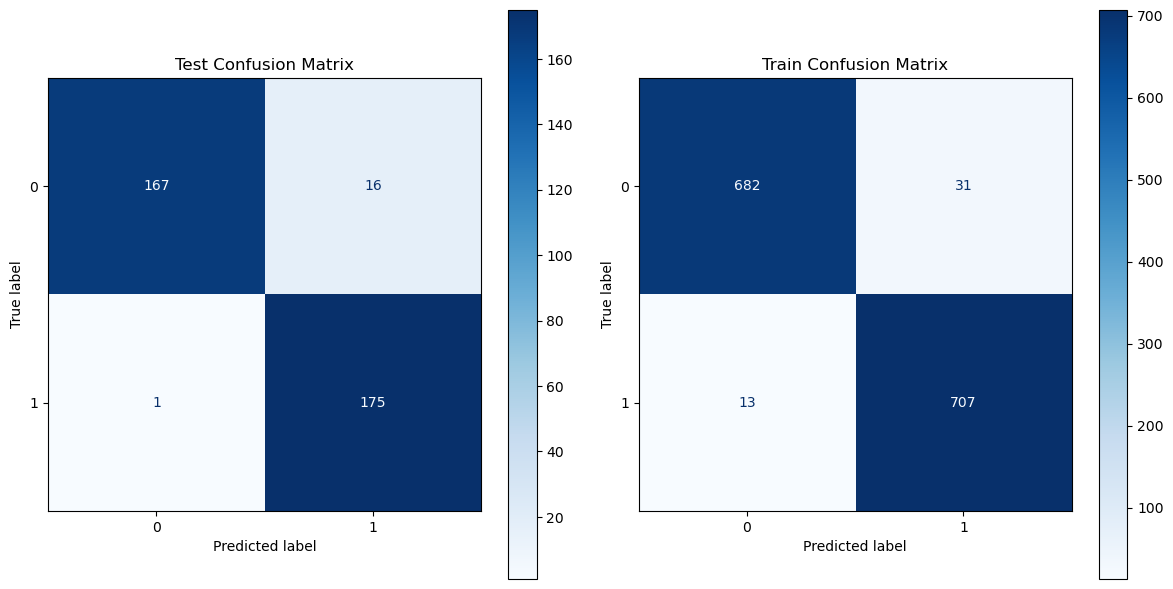

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       183
           1       0.92      0.99      0.95       176

    accuracy                           0.95       359
   macro avg       0.96      0.95      0.95       359
weighted avg       0.96      0.95      0.95       359



In [8]:
y_pred_test_logit = model.predict(X_test)
y_pred_train_logit = model.predict(x_train)
print_metrics(y_train, y_pred_train_logit, Y_test, y_pred_test_logit)
plot_confusion_matrices(Y_test, y_pred_test_logit, y_train, y_pred_train_logit)
print("Logistic Regression Classification Report:\n", classification_report(Y_test, y_pred_test_logit))

# Linear Discriminant Analysis (LDA)

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

Training Metrics:
Accuracy: 0.96
Precision: 0.95
Sensitivity (Recall): 0.97
Specificity: 0.95
F1 Score: 0.96

Testing Metrics:
Accuracy: 0.92
Precision: 0.90
Sensitivity (Recall): 0.93
Specificity: 0.90
F1 Score: 0.92


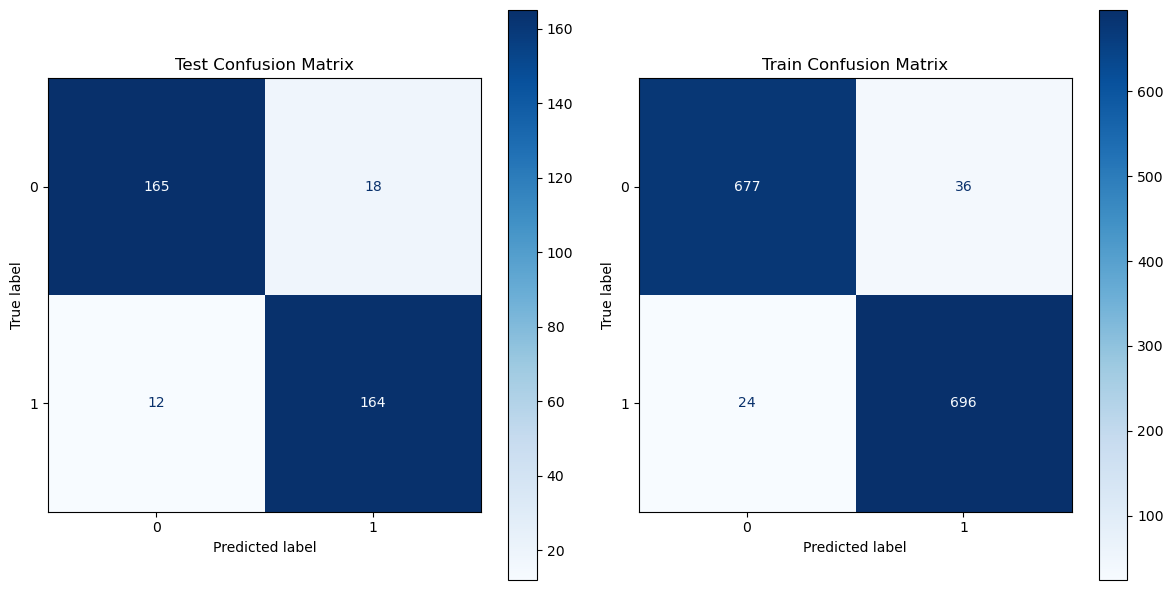

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       183
           1       0.90      0.93      0.92       176

    accuracy                           0.92       359
   macro avg       0.92      0.92      0.92       359
weighted avg       0.92      0.92      0.92       359



In [10]:
y_trn_pred_lda= lda.predict(x_train)
Y_test_pred_lda = lda.predict(X_test)
print_metrics(y_train, y_trn_pred_lda, Y_test, Y_test_pred_lda)
plot_confusion_matrices(Y_test, Y_test_pred_lda, y_train, y_trn_pred_lda)
print("LDA Classification Report:\n", classification_report(Y_test, Y_test_pred_lda))

# Quadratic Discriminant Analysis (QDA)

In [11]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [12]:
# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(qda, x_train, y_train, cv=5)
y_pred_test_cv = cross_val_predict(qda, X_test, Y_test, cv=5)

C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-

C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-

Training Metrics:
Accuracy: 1.00
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
F1 Score: 1.00

Testing Metrics:
Accuracy: 0.97
Precision: 1.00
Sensitivity (Recall): 0.95
Specificity: 1.00
F1 Score: 0.97


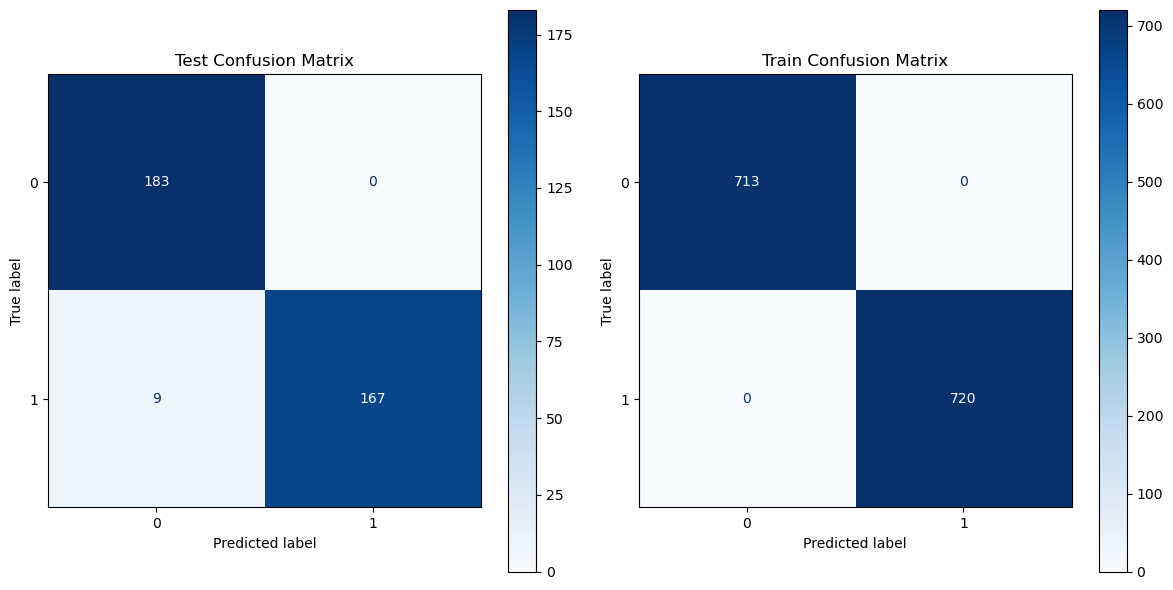

QDA Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       183
           1       1.00      0.95      0.97       176

    accuracy                           0.97       359
   macro avg       0.98      0.97      0.97       359
weighted avg       0.98      0.97      0.97       359



In [13]:
# Perform cross-validation and get predictions
y_pred_cv_train = cross_val_predict(qda, x_train, y_train, cv=5)
y_pred_cv_test = cross_val_predict(qda, X_test, Y_test, cv=5)
print_metrics(y_train, y_pred_cv_train, Y_test,y_pred_cv_test )
plot_confusion_matrices(Y_test, y_pred_cv_test, y_train, y_pred_cv_train)
print("QDA Classification Report:\n", classification_report(Y_test, y_pred_test_cv,zero_division =0))

# SVM

In [14]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

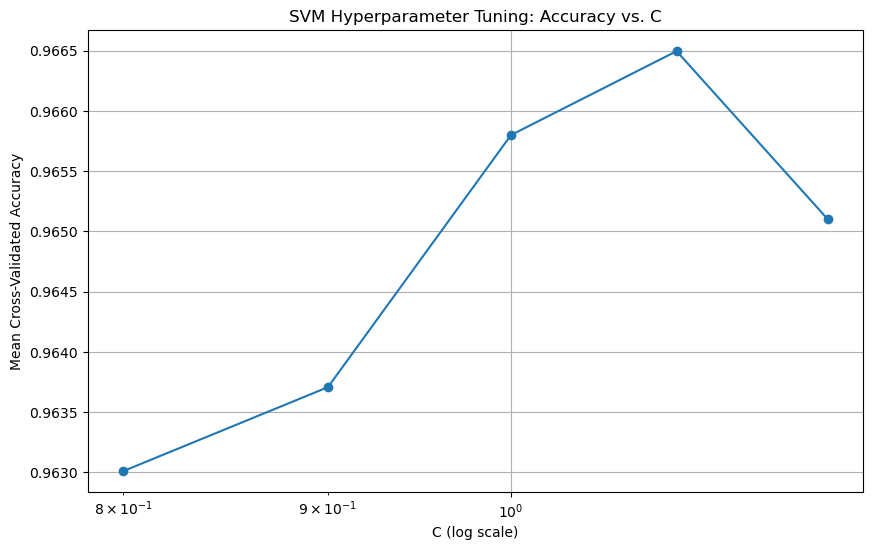

Best C: 1.1


In [15]:
# Define and train models
param_grid = {'C': [0.8,0.9,1.0,1.1,1.2]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
mean_test_scores = grid_search.cv_results_['mean_test_score']
C_values = param_grid['C']
# Plot mean cross-validated scores for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('SVM Hyperparameter Tuning: Accuracy vs. C')
plt.grid(True)
plt.show()
# Best parameter from cross-validation
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

In [18]:
# Train SVM with the best parameter on the training set
svm = SVC(kernel='linear', C=best_C, random_state=42)
svm.fit(x_train, y_train)
# Predict the labels for the training and test sets
y_train_pred_svm= svm.predict(x_train)
y_test_pred_svm = svm.predict(X_test)

Training Metrics:
Accuracy: 0.98
Precision: 0.97
Sensitivity (Recall): 0.99
Specificity: 0.97
F1 Score: 0.98

Testing Metrics:
Accuracy: 0.91
Precision: 0.89
Sensitivity (Recall): 0.94
Specificity: 0.89
F1 Score: 0.91


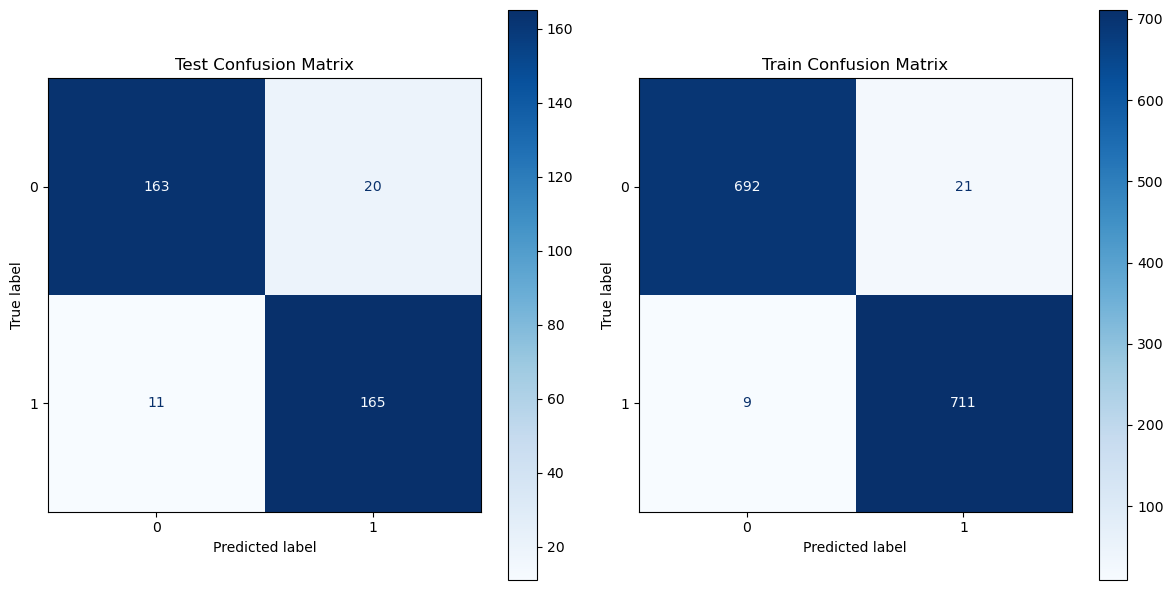

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       183
           1       0.89      0.94      0.91       176

    accuracy                           0.91       359
   macro avg       0.91      0.91      0.91       359
weighted avg       0.91      0.91      0.91       359



In [19]:
print_metrics(y_train, y_train_pred_svm, Y_test, y_test_pred_svm)
plot_confusion_matrices(Y_test, y_test_pred_svm, y_train, y_train_pred_svm)
print("SVM Classification Report:\n", classification_report(Y_test, y_test_pred_svm))

In [20]:
# Define kernel types and C values to test
kernels = ['linear', 'poly', 'rbf']
c_values = [ 0.8,0.9, 1.0,1.1,1.2]  # Example C values
# Initialize an empty dictionary to store results
results = {kernel: {c: {} for c in c_values} for kernel in kernels}
for kernel in kernels:
    for c in c_values:
        # Perform SVM on the training set with different kernels and C values
        svm = SVC(kernel=kernel, C=c, random_state=42, probability=True)
        svm.fit(x_train, y_train)
        # Predict on the test set
        y_pred = svm.predict(X_test)
        # Calculate metrics
        accuracy = accuracy_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred, average='binary')
        recall = recall_score(Y_test, y_pred, average='binary')
        f1 = f1_score(Y_test, y_pred, average='binary')
        # Store the metrics in the results dictionary
        results[kernel][c] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
# Print results with labels
print("Results for SVM with different kernels and C values:")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Kernel', 'C', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
        
for kernel in kernels:
    for c in c_values:
        metrics = results[kernel][c]
        print("{:<10} {:<10} {:.4f}    {:.4f}    {:.4f}    {:.4f}".format(
            kernel, c, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score']
        ))

Results for SVM with different kernels and C values:
Kernel     C          Accuracy   Precision  Recall     F1 Score  
linear     0.8        0.9276    0.9032    0.9545    0.9282
linear     0.9        0.9220    0.8936    0.9545    0.9231
linear     1.0        0.9192    0.8930    0.9489    0.9201
linear     1.1        0.9136    0.8919    0.9375    0.9141
linear     1.2        0.9109    0.8913    0.9318    0.9111
poly       0.8        0.9471    0.9067    0.9943    0.9485
poly       0.9        0.9499    0.9115    0.9943    0.9511
poly       1.0        0.9526    0.9162    0.9943    0.9537
poly       1.1        0.9554    0.9211    0.9943    0.9563
poly       1.2        0.9582    0.9259    0.9943    0.9589
rbf        0.8        0.9749    0.9613    0.9886    0.9748
rbf        0.9        0.9777    0.9667    0.9886    0.9775
rbf        1.0        0.9777    0.9667    0.9886    0.9775
rbf        1.1        0.9777    0.9667    0.9886    0.9775
rbf        1.2        0.9777    0.9667    0.9886    0.9

# (ROC) Curve

C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


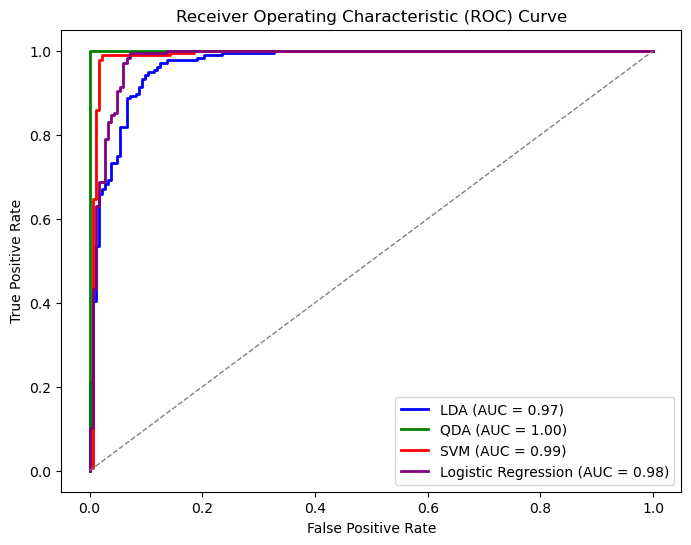

In [22]:
logistic = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm = SVC(probability=True)  # SVM needs probability=True for predict_proba
# Fit models
logistic.fit(x_train, y_train)
lda.fit(x_train, y_train)
qda.fit(x_train, y_train)
svm.fit(x_train, y_train)
# Calculate the probability estimates for the test set
y_prob_logit = logistic.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_qda_cv = cross_val_predict(qda, X_test, Y_test, cv=5,method='predict_proba')[:, 1]
y_prob_lda = lda.predict_proba(X_test)[:, 1]
# Calculate the ROC curve for each model
fpr_lda, tpr_lda, _ = roc_curve(Y_test, y_prob_lda)
fpr_qda, tpr_qda, _ = roc_curve(Y_test, y_prob_qda_cv)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_prob_svm)
fpr_logit, tpr_logit, _ = roc_curve(Y_test, y_prob_logit)
# Calculate AUC for each model
auc_lda = auc(fpr_lda, tpr_lda)
auc_qda = auc(fpr_qda, tpr_qda)
auc_svm = auc(fpr_svm, tpr_svm)
auc_logit = auc(fpr_logit, tpr_logit)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label=f'LDA (AUC = {auc_lda:.2f})')
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label=f'QDA (AUC = {auc_qda:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_logit, tpr_logit, color='purple', lw=2, label=f'Logistic Regression (AUC = {auc_logit:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()